In [42]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from Qommunity.samplers.hierarchical.advantage_sampler import AdvantageSampler
from Qommunity.searchers.hierarchical_searcher import HierarchicalSearcher
from Qommunity.iterative_searcher import IterativeSearcher

## Please use it with QHyper basiav/sampleset_info_extraction branch
https://github.com/qc-lab/QHyper/tree/basiav/sampleset_info_extraction

In [4]:
import os


test_dir = "test"
os.makedirs(test_dir, exist_ok=True)

In [43]:
n = 100
m = 1
p=0.1

graph_powerlaw_100_path = f"{test_dir}/graph_powerlaw_n={n}_m={m}_p={p}.npy"
try:
    G = np.load(graph_powerlaw_100_path, allow_pickle=True)
    print(f"Graph loaded from {graph_powerlaw_100_path}.")
except Exception as e:
    print(f"Could not load graph from {graph_powerlaw_100_path}. Generating a new one.")
    G = nx.powerlaw_cluster_graph(n=n, m=m, p=p)
    np.save(graph_powerlaw_100_path, G)
    print(f"Graph saved to {graph_powerlaw_100_path}.")

Could not load graph from test/graph_powerlaw_n=100_m=1_p=0.1.npy. Generating a new one.
Graph saved to test/graph_powerlaw_n=100_m=1_p=0.1.npy.


## Usage

#### 1. For the `AdvantageSampler`, set `return_sampleset_metadata=True`

In [5]:
num_reads = 100
version = ""
region = "na-west-1"

advantage = AdvantageSampler(
    G, num_reads=num_reads, version=version, region=region, use_clique_embedding=True, elapse_times=True, return_sampleset_metadata=True
)

In [5]:
iterative_searcher = IterativeSearcher(sampler=advantage)

Quick reminder of IterativeSearcher's usage we have practiced so far for full hierarchical runs info:

In [105]:
res_like_before = iterative_searcher.run_with_sampleset_info(
    num_runs=1,
    save_results=False,
    iterative_verbosity=1,
    return_sampleset_metadata=False
)

Starting community detection iterations


100%|██████████| 1/1 [02:59<00:00, 179.58s/it]

Iteration 0 completed


In [14]:
res = res_like_before
communities, modularities, times, division_trees, division_modularities = res.communities, res.modularity, res.time, res.division_tree, res.division_modularities

### Set `return_sampleset_metadata=True` to `ItearativeSearcher`'s run method

In [5]:
dir_adv_clique = f"{test_dir}/advantage_clique"
os.makedirs(dir_adv_clique, exist_ok=True)

In [1]:
import numpy as np
import pickle

In [8]:
with open(f"test/advantage_clique_samplesets_data.pkl",'rb') as file:
    res = pickle.load(file)

In [14]:
table = res[0].dwave_sampleset_metadata
table

rec.array([(24068., 20., 200.1 , 39829.56, 1539.44, 15761.56, 20.58, 48., 48.),
           (13672., 20.,  96.14, 29430.76, 1879.24, 15758.76, 20.58, 43., 43.),
           (20926., 20., 168.68, 36684.36, 1196.64, 15758.36, 20.58,  1.,  1.),
           (20410., 20., 163.52, 36168.76, 1159.24, 15758.76, 20.58,  1.,  1.),
           (12456., 20.,  83.98, 28215.16, 1035.84, 15759.16, 20.58,  1.,  1.),
           ( 8254., 20.,  41.96, 24013.56, 1841.44, 15759.56, 20.58,  1.,  1.),
           (10628., 20.,  65.7 , 26387.96, 1017.04, 15759.96, 20.58,  1.,  1.),
           (20020., 20., 159.62, 35778.76, 2209.24, 15758.76, 20.58,  1.,  1.),
           (12660., 20.,  86.02, 28419.56, 3357.44, 15759.56, 20.58, 75., 75.),
           (12412., 20.,  83.54, 28171.56, 1339.44, 15759.56, 20.58,  1.,  1.),
           (10628., 20.,  65.7 , 26387.96, 1011.04, 15759.96, 20.58,  1.,  1.),
           (12632., 20.,  85.74, 28391.16, 1766.84, 15759.16, 20.58,  1.,  1.),
           (13536., 20.,  94.78, 29295.1

In [30]:
from QHyper.problems.community_detection import CommunityDetectionProblem
from QHyper.solvers.quantum_annealing.dwave.advantage import Advantage
from QHyper.solvers.quantum_annealing.dwave.advantage import convert_qubo_keys

In [35]:
import os
from typing import Any, Callable, Dict
import numpy as np
import numpy.typing as npt
from dataclasses import dataclass
from collections import defaultdict

from QHyper.problems.base import Problem
from QHyper.solvers.base import Solver, SolverResult, SamplesetData
from QHyper.converter import Converter
from QHyper.constraint import Polynomial

from dwave.system import DWaveSampler, EmbeddingComposite
from dwave.system.composites import FixedEmbeddingComposite
from dimod import BinaryQuadraticModel
from dwave.embedding.pegasus import find_clique_embedding

from enum import Enum
import time

import os
from typing import Any, Callable, Dict
import numpy as np
import numpy.typing as npt
from dataclasses import dataclass
from collections import defaultdict

from QHyper.problems.base import Problem
from QHyper.solvers.base import Solver, SolverResult, SamplesetData
from QHyper.converter import Converter
from QHyper.constraint import Polynomial

from dwave.system import DWaveSampler, EmbeddingComposite
from dwave.system.composites import FixedEmbeddingComposite
from dimod import BinaryQuadraticModel
from dwave.embedding.pegasus import find_clique_embedding

from enum import Enum
import time

from QHyper.problems.community_detection import CommunityDetectionProblem, Network


In [45]:
problem = CommunityDetectionProblem(network_data=Network(G), one_hot_encoding=False)

In [ ]:
DWAVE_API_TOKEN = os.environ.get("DWAVE_API_TOKEN")



num_reads = 100
version = ""
region = "na-west-1"

sampler = DWaveSampler(
    solver=version,
    region=region,
    token=DWAVE_API_TOKEN,
)

args = []
qubo = Converter.create_qubo(problem, args)
qubo_terms, offset = convert_qubo_keys(qubo)
bqm = BinaryQuadraticModel.from_qubo(qubo_terms, offset=offset)

embedding = find_clique_embedding(
                    bqm.to_networkx_graph(),
                    target_graph=sampler.to_networkx_graph(),)

embedding_composite = FixedEmbeddingComposite(sampler, embedding)

sampleset = embedding_composite.sample(
        bqm,
        num_reads=num_reads,
)


In [48]:
sampleset

SampleSet(rec.array([([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0], -46.31818182, 1, 0.  ),
           ([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1], -45.45454545, 1, 0.  ),
           ([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1], 

In [49]:
result = np.recarray(
    (len(sampleset),),
    dtype=(
        [(v, int) for v in sampleset.variables]
        + [("probability", float)]
        + [("energy", float)]
    ),
)

num_of_shots = sampleset.record.num_occurrences.sum()
for i, solution in enumerate(sampleset.data()):
    for var in sampleset.variables:
        result[var][i] = solution.sample[var]

    result["probability"][i] = solution.num_occurrences / num_of_shots
    result["energy"][i] = solution.energy

In [53]:
sampleset.info["timing"]

{'qpu_sampling_time': 24068.0,
 'qpu_anneal_time_per_sample': 20.0,
 'qpu_readout_time_per_sample': 200.1,
 'qpu_access_time': 39833.56,
 'qpu_access_overhead_time': 1064.44,
 'qpu_programming_time': 15765.56,
 'qpu_delay_time_per_sample': 20.58,
 'post_processing_overhead_time': 1.0,
 'total_post_processing_time': 1.0}

In [56]:
sampleset_info_timing = {}
keys_modified = [key + "_s" for key in sampleset.info["timing"].keys()]
sampleset_info_timing = dict(zip(keys_modified, sampleset.info["timing"].values()))
sampleset_info_timing

{'qpu_sampling_time_s': 24068.0,
 'qpu_anneal_time_per_sample_s': 20.0,
 'qpu_readout_time_per_sample_s': 200.1,
 'qpu_access_time_s': 39833.56,
 'qpu_access_overhead_time_s': 1064.44,
 'qpu_programming_time_s': 15765.56,
 'qpu_delay_time_per_sample_s': 20.58,
 'post_processing_overhead_time_s': 1.0,
 'total_post_processing_time_s': 1.0}

In [ ]:
for key, value in sampleset.info["timing"].items()

In [50]:
sampleset_info = None
if return_sampleset_metadata:
    sampleset_info = SamplesetData(
        time_dict_to_ndarray(sampleset.info["timing"]),
        time_dict_to_ndarray(self.times),
    )

NameError: name 'return_sampleset_metadata' is not defined

In [29]:
table.dtype.names

('qpu_sampling_time',
 'qpu_anneal_time_per_sample',
 'qpu_readout_time_per_sample',
 'qpu_access_time',
 'qpu_access_overhead_time',
 'qpu_programming_time',
 'qpu_delay_time_per_sample',
 'post_processing_overhead_time',
 'total_post_processing_time')

In [22]:
[el+"_s" for el in table.dtype.names]

['qpu_sampling_time_s',
 'qpu_anneal_time_per_sample_s',
 'qpu_readout_time_per_sample_s',
 'qpu_access_time_s',
 'qpu_access_overhead_time_s',
 'qpu_programming_time_s',
 'qpu_delay_time_per_sample_s',
 'post_processing_overhead_time_s',
 'total_post_processing_time_s']

In [90]:
res = iterative_searcher.run_with_sampleset_info(
    num_runs=5,
    save_results=True,
    saving_path=dir_adv_clique,
    iterative_verbosity=1,
    return_sampleset_metadata=True,
)

Starting community detection iterations


 20%|██        | 1/5 [04:23<17:34, 263.65s/it]

Iteration 0 completed


 40%|████      | 2/5 [06:38<09:23, 187.88s/it]

Iteration 1 completed


 60%|██████    | 3/5 [11:21<07:42, 231.09s/it]

Iteration 2 completed


 80%|████████  | 4/5 [14:18<03:30, 210.08s/it]

Iteration 3 completed


100%|██████████| 5/5 [20:16<00:00, 243.36s/it]

Iteration 4 completed


In [113]:
communities, modularities, times, division_trees, division_modularities, sampleset_datas = res.communities, res.modularity, res.time, res.division_tree, res.division_modularities, res.samplesets_data

## Sampleset data interetation

In [92]:
# Shape interpretation
print(f"Data from {len(sampleset_datas)} iteartive runs")
print(f"Number of Problem (QUBO) forumulations in the first run: {len(sampleset_datas[0].dwave_sampleset_metadata)}")
print(f"Number of Problem (QUBO) forumulations in the second run: {len(sampleset_datas[1].dwave_sampleset_metadata)}")
assert len(sampleset_datas[0].dwave_sampleset_metadata) == len(sampleset_datas[0].time_measurements)
assert len(sampleset_datas[1].dwave_sampleset_metadata) == len(sampleset_datas[1].time_measurements)

Data from 5 iteartive runs
Number of Problem (QUBO) forumulations in the first run: 23
Number of Problem (QUBO) forumulations in the second run: 23


In [93]:
sampleset_datas

array([HierarchicalRunMetadata(dwave_sampleset_metadata=rec.array([(24068., 20., 200.1 , 39829.56, 1539.44, 15761.56, 20.58, 48., 48.),
                  (13672., 20.,  96.14, 29430.76, 1879.24, 15758.76, 20.58, 43., 43.),
                  (20926., 20., 168.68, 36684.36, 1196.64, 15758.36, 20.58,  1.,  1.),
                  (20410., 20., 163.52, 36168.76, 1159.24, 15758.76, 20.58,  1.,  1.),
                  (12456., 20.,  83.98, 28215.16, 1035.84, 15759.16, 20.58,  1.,  1.),
                  ( 8254., 20.,  41.96, 24013.56, 1841.44, 15759.56, 20.58,  1.,  1.),
                  (10628., 20.,  65.7 , 26387.96, 1017.04, 15759.96, 20.58,  1.,  1.),
                  (20020., 20., 159.62, 35778.76, 2209.24, 15758.76, 20.58,  1.,  1.),
                  (12660., 20.,  86.02, 28419.56, 3357.44, 15759.56, 20.58, 75., 75.),
                  (12412., 20.,  83.54, 28171.56, 1339.44, 15759.56, 20.58,  1.,  1.),
                  (10628., 20.,  65.7 , 26387.96, 1011.04, 15759.96, 20.58,  1., 

In [94]:
first_run = sampleset_datas[0]
second_run = sampleset_datas[1]

# Results structure

In [95]:
# DWave metadata extracted from the DWave "sampleset" result
first_run.dwave_sampleset_metadata

rec.array([(24068., 20., 200.1 , 39829.56, 1539.44, 15761.56, 20.58, 48., 48.),
           (13672., 20.,  96.14, 29430.76, 1879.24, 15758.76, 20.58, 43., 43.),
           (20926., 20., 168.68, 36684.36, 1196.64, 15758.36, 20.58,  1.,  1.),
           (20410., 20., 163.52, 36168.76, 1159.24, 15758.76, 20.58,  1.,  1.),
           (12456., 20.,  83.98, 28215.16, 1035.84, 15759.16, 20.58,  1.,  1.),
           ( 8254., 20.,  41.96, 24013.56, 1841.44, 15759.56, 20.58,  1.,  1.),
           (10628., 20.,  65.7 , 26387.96, 1017.04, 15759.96, 20.58,  1.,  1.),
           (20020., 20., 159.62, 35778.76, 2209.24, 15758.76, 20.58,  1.,  1.),
           (12660., 20.,  86.02, 28419.56, 3357.44, 15759.56, 20.58, 75., 75.),
           (12412., 20.,  83.54, 28171.56, 1339.44, 15759.56, 20.58,  1.,  1.),
           (10628., 20.,  65.7 , 26387.96, 1011.04, 15759.96, 20.58,  1.,  1.),
           (12632., 20.,  85.74, 28391.16, 1766.84, 15759.16, 20.58,  1.,  1.),
           (13536., 20.,  94.78, 29295.1

In [96]:
# The times we have explicitly measured in the code
first_run.time_measurements

rec.array([(0.2361546, 0.0458715, 0.1153451),
           (0.1951996, 0.0291519, 0.0403044),
           (0.2144589, 0.0271958, 0.033037 ),
           (0.5517522, 0.0670922, 0.04159  ),
           (0.350565 , 0.02083  , 0.0196958),
           (0.3851209, 0.0324176, 0.0220191),
           (0.3480354, 0.0361092, 0.0228903),
           (0.2462936, 0.0240342, 0.024737 ),
           (0.2979721, 0.0280832, 0.0324625),
           (0.2533547, 0.0253566, 0.0202098),
           (0.3596063, 0.0482458, 0.0263479),
           (0.298037 , 0.0265313, 0.0214186),
           (0.3189653, 0.0379818, 0.0583632),
           (0.3223072, 0.0354878, 0.0328111),
           (0.2537223, 0.0226689, 0.0256617),
           (0.4720073, 0.0353492, 0.0321037),
           (0.3200256, 0.0342991, 0.0231704),
           (0.2692274, 0.0295621, 0.0209709),
           (0.2991378, 0.0261974, 0.0307232),
           (0.3386535, 0.0325602, 0.0222849),
           (0.3517918, 0.0388968, 0.0247074),
           (0.3010615, 0.0365975, 

# QPU access times

Each record contains subdivion (subproblem recursive divisions) times of the whole hierarchical run. \
These times unordered! - they do not necessarily reflect the order of subdivision on each recursion level - TODO \
However the first one reflects the time (qpu_access_time in this example) of the very first binary division - of the whole problem.

In [97]:
first_run.dwave_sampleset_metadata.qpu_access_time

array([39829.56, 29430.76, 36684.36, 36168.76, 28215.16, 24013.56,
       26387.96, 35778.76, 28419.56, 28171.56, 26387.96, 28391.16,
       29295.16, 36168.36, 35665.16, 28435.16, 28215.16, 28127.56,
       36193.16, 28259.16, 35665.16, 28215.56, 28435.16])

### Qpu access times in the 1st hierarchical community search run

In [98]:
# sum of subproblems (subdivisions) times in the first run
first_run_qpu_access_time = first_run.dwave_sampleset_metadata.qpu_access_time.sum()
print(f"QPU access time in the first run: {first_run_qpu_access_time:.2f} microseconds == {first_run_qpu_access_time / 1e6:.4f} seconds")

QPU access time in the first run: 710553.88 microseconds == 0.7106 seconds


# Getting the embedding from cache 
Calling the `find_clique_embedding` function time - "getting" the embeddings for subproblems from cache

In [99]:
first_run.time_measurements.find_clique_embedding_time

array([0.2361546, 0.1951996, 0.2144589, 0.5517522, 0.350565 , 0.3851209,
       0.3480354, 0.2462936, 0.2979721, 0.2533547, 0.3596063, 0.298037 ,
       0.3189653, 0.3223072, 0.2537223, 0.4720073, 0.3200256, 0.2692274,
       0.2991378, 0.3386535, 0.3517918, 0.3010615, 0.3129299])

### Obtaining the embeddings time from cache for the whole community search run

In [100]:
first_run_cl_emb_cache_taking = first_run.time_measurements.find_clique_embedding_time.sum()
print(f"Time of taking embeddings from cache in the first run: {first_run_cl_emb_cache_taking:.2f} seconds")
print(f"With clique embedding, sampling is fast: {first_run.time_measurements.sample_time.sum():.2f} seconds")

Time of taking embeddings from cache in the first run: 7.30 seconds
With clique embedding, sampling is fast: 0.74 seconds


# QPU times comparison iterative hierarchical search runs

In [166]:
qpu_access_times_per_hierarachical_run = np.array([run.dwave_sampleset_metadata.qpu_access_time.sum() for run in sampleset_datas])
print(f"Mean of QPU access times from 5 runs: {qpu_access_times_per_hierarachical_run.mean():.2f} microseconds")
print(f"STD of QPU access times from 5 runs: {qpu_access_times_per_hierarachical_run.std():.2f} microseconds")
qpu_access_times_per_hierarachical_run

Mean of QPU access times from 5 runs: 723864.90 microseconds
STD of QPU access times from 5 runs: 21142.35 microseconds


array([710553.88, 706183.88, 708493.08, 732314.24, 761779.4 ])

In [165]:
no_communities_in_runs = [len(communities) for communities in communities]
no_communities_in_runs

[12, 12, 12, 13, 13]

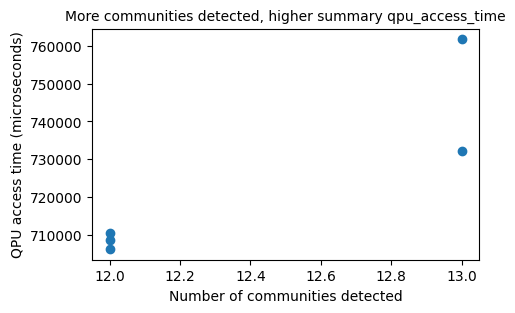

In [161]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(no_communities_in_runs, qpu_access_times_per_hierarachical_run);
ax.set_xlabel("Number of communities detected");
ax.set_ylabel("QPU access time (microseconds)");
plt.title("More communities detected, higher summary qpu_access_time", fontsize=10);

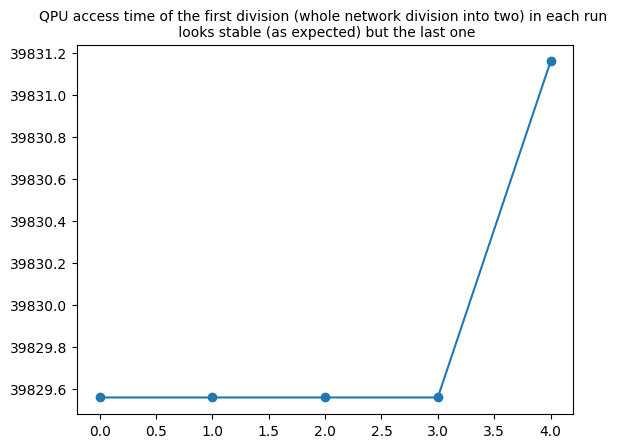

In [155]:
qpu_access_times_first_divisions = [run.dwave_sampleset_metadata.qpu_access_time[0] for run in sampleset_datas]
qpu_access_times_first_divisions

plt.plot(qpu_access_times_first_divisions, marker="o")
plt.title("QPU access time of the first division (whole network division into two) in each run \n looks stable (as expected) but the last one", fontsize=10);

### Heuristic

In [6]:
advantage = AdvantageSampler(
    G, num_reads=num_reads, version=version, region=region, use_clique_embedding=False, elapse_times=True, return_sampleset_metadata=True
)

In [7]:
iterative_searcher = IterativeSearcher(advantage)

In [14]:
os.makedirs(f"{test_dir}/heuristic", exist_ok=True)

In [52]:
res_heu = iterative_searcher.run_with_sampleset_info(
    num_runs=5,
    save_results=True,
    saving_path=f"{test_dir}/heuristic/adv_heuristic",
    iterative_verbosity=1,
    return_sampleset_metadata=True,
)

Starting community detection iterations


 20%|██        | 1/5 [03:27<13:50, 207.51s/it]

Iteration 0 completed


 40%|████      | 2/5 [07:06<10:42, 214.23s/it]

Iteration 1 completed


 60%|██████    | 3/5 [11:46<08:08, 244.46s/it]

Iteration 2 completed


 80%|████████  | 4/5 [15:56<04:06, 246.55s/it]

Iteration 3 completed


100%|██████████| 5/5 [21:19<00:00, 255.83s/it]

Iteration 4 completed


In [55]:
communities_heu, modularities_heu, times_heu, division_trees_heu, division_modularities_heu, sampleset_datas_heu = res_heu.communities, res_heu.modularity, res_heu.time, res_heu.division_tree, res_heu.division_modularities, res_heu.samplesets_data

Results heuristic embedding qpu_access_time

In [ ]:
it_searcher_iteration_to_consider = 2

res_heu.samplesets_data[it_searcher_iteration_to_consider].dwave_sampleset_metadata.qpu_access_time

array([41884.76, 29929.56, 26957.96, 26007.96, 25516.76, 26899.96,
       26135.96, 31268.76, 30705.16, 23638.76, 35985.96, 27872.76,
       30193.96, 27419.96, 27665.16, 24911.96, 25023.56, 27264.36,
       23667.96, 28340.36, 25732.36, 26199.96])

In [62]:
total_qpu_time_iteration_i = res_heu.samplesets_data[it_searcher_iteration_to_consider].dwave_sampleset_metadata.qpu_access_time.sum()
print(f"Total QPU access time for the iteration: {it_searcher_iteration_to_consider}: {total_qpu_time_iteration_i:.2f} microseconds == {total_qpu_time_iteration_i / 1e6:.4f} seconds")

Total QPU access time for the iteration: 2: 619223.92 microseconds == 0.6192 seconds


In [67]:
qpu_access_times_from_5_hierarchical_runs_heu_emb = [run.samplesets_data.dwave_sampleset_metadata.qpu_access_time.sum() for run in res_heu]
qpu_access_times_from_5_hierarchical_runs_heu_emb

[580447.2000000001, 748797.3200000001, 619223.9199999999, 680355.04, 687423.8]

In [68]:
qpu_access_times_from_5_hierarchical_runs_heu_emb

[580447.2000000001, 748797.3200000001, 619223.9199999999, 680355.04, 687423.8]

Let's compare them against clique embedding times

In [75]:
# previous runs with clique embedding from top of this notebook
samplesets_metadata_cl_emb_5_runs = np.load(f"{test_dir}/advantage_clique_samplesets_data.pkl", allow_pickle=True)
qpu_access_times_from_5_hierarchical_runs_cl_emb = [run.dwave_sampleset_metadata.qpu_access_time.sum() for run in samplesets_metadata_cl_emb_5_runs]
qpu_access_times_from_5_hierarchical_runs_cl_emb

[710553.8800000002, 706183.8800000002, 708493.0800000002, 732314.24, 761779.4]

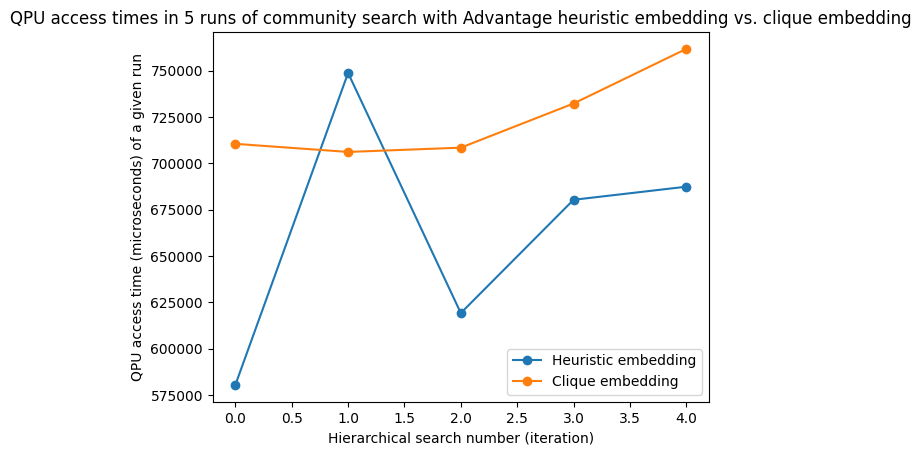

In [86]:
plt.plot(qpu_access_times_from_5_hierarchical_runs_heu_emb, marker="o", label="Heuristic embedding")
plt.plot(qpu_access_times_from_5_hierarchical_runs_cl_emb, marker="o", label="Clique embedding")
plt.legend()
plt.xlabel("Hierarchical search number (iteration)");
plt.ylabel("QPU access time (microseconds) of a given run");
plt.title("QPU access times in 5 runs of community search with Advantage heuristic embedding vs. clique embedding");